در این قسمت کتابخانه های مورد نیاز فراخوانی شده اند

In [1]:
import numpy as np
import matplotlib.pyplot as plt


در این قسمت ماتریس وزن ها و بایاس لایه اول تعریف شده

In [2]:
# Perceptron weights
W1 = np.array([1, -1]) #تابع وزن نورون اول
W2 = np.array([1, 1]) #تابع وزن نورون دوم
W3 = np.array([0, 1]) #تابع وزن نورون سوم

# Perceptron bias
bias1 = -25 #بایاس نورون اول
bias2 = +25 #بایاس نورون دوم
bias3 = 0 #بایاس نورون سوم


در این قسمت مثلثی که این سه نورون در فضای دو بعدی رسم می کنند نشان داده شده

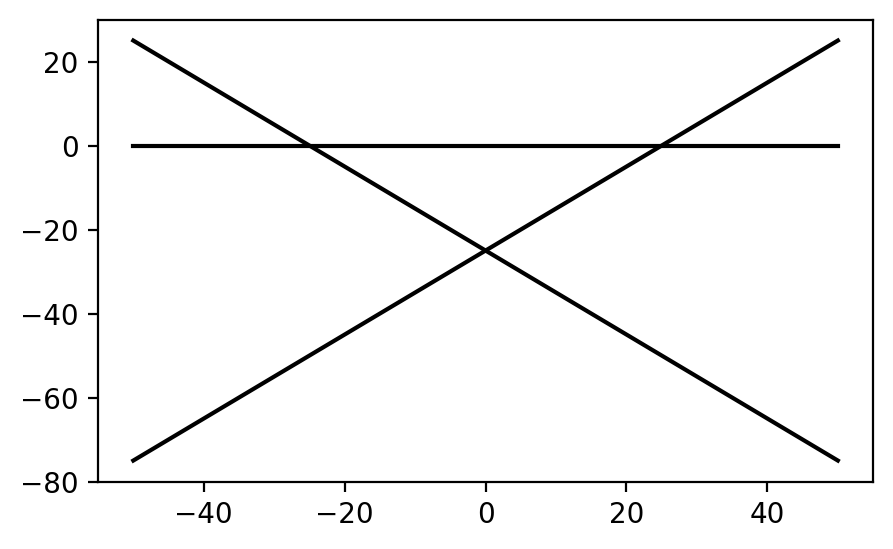

In [3]:
x = np.linspace(-50, 50, 1000) 
y1 = (W1[0]*x+bias1)/-W1[1]
y2 = (W2[0]*x+bias2)/-W2[1]
y3 = (W3[0]*x+bias3)/-W3[1]
plt.figure(figsize=(5,3),dpi=200)
plt.plot(x, y1, color='black')
plt.plot(x, y2, color='black')
plt.plot(x, y3, color='black')
plt.show()


در این قسمت پارامترهای شبکه پرسپترون تعریف شده و چند تابع برای آموزش تعریف شده است

In [4]:
tetap = 0.2 #ترشهولد
tetan = -0.2 #ترشهولد
Alfa = 1 #نرخ یادگیری

#تابع پله
def calculate_output(input):
    result = 0
    if input > tetap:
        result = 1
    if input < tetan:
        result = -1
    if tetan <input < tetap:
        result = 0
    return result

#الگوریتم یادگیری پرسپترون   
def algoritm (input, weight, bias, target):
    for i in range (8):
        R = 0
        for j in range (3):
            R = input[i,j]*weight[j]+ R
        R=R+bias
        R = calculate_output(R)
        if R != target[0,i]: #آیا آموزش نیاز است یا خیر؟
            for j in range (3):
                weight[j] = weight[j] + Alfa*input[i,j]*target[0,i] #تغییر وزن ها
                bias = bias + target[0,i]*Alfa
    return weight, bias

در این قسمت پترن ها و تارگت های لایه دوم تعریف شده و لایه دوم آموزش میبیند تا ماتریس وزن و بایاس آن بدست آید و در نهایت این لایه با تمام ورودی های ممکن تست شده تا از صحت آن اطمینان حاصل شود، آموزش در 10 ایپاک انجام شده، در این قسمت تابع آوت پوت ورودی هر نورون را محاسبه میکند و تابع تست خروجی نهایی نورون را نشان میدهد

In [5]:
Target = np.array ([[-1, -1,-1, -1,-1,1,-1,-1]]) #ماتریس اهداف
paterns = np.array ([[ 1, 1, 1],[ 1, 1,-1],[ 1,-1, 1],[ 1,-1,-1],[-1, 1, 1],[-1, 1,-1],[-1,-1, 1],[-1,-1,-1]]) #پترن هاای ممکن
P1 = np.array ([[1,1,1]])
P2 = np.array ([[1,1,-1]])
P3 = np.array ([[1,-1,1]])
P4 = np.array ([[1,-1,-1]])
P5 = np.array ([[-1,1,1]])
P6 = np.array ([[-1,1,-1]])
P7 = np.array ([[-1,-1,1]])
P8 = np.array ([[-1,-1,-1]])



W4 = np.zeros((3)) #ماتریس وزن نورون 4
bias4 = 0 #بایاس نورون4
n4 = 0 #تعداد ایپاک

#انجام آموزش نورون
while (n4<10):
    n4 = n4+1
    W4, bias4 = algoritm (paterns, W4, bias4,Target)



#تابع محاسبه خروجی
def output(input, weight, bias):
    sum = 0
    for i in range (1):
        for j in range (3):
            sum = sum + weight[j]*input [i,j]
    sum = sum+bias
    return sum

#تابع آزمودن شبکه
def test (input,weghit,bias):
    print ("The Results are:")
    S = output (input, weghit, bias)
    S = calculate_output(S)
    print (S)
    return S

#آزمودن نورون
print (W4)
print (bias4)
test(P1,W4,bias4)
test(P2,W4,bias4)
test(P3,W4,bias4)
test(P4,W4,bias4)
test(P5,W4,bias4)
test(P6,W4,bias4)
test(P7,W4,bias4)
test(P8,W4,bias4)




[-2.  4. -2.]
-6
The Results are:
-1
The Results are:
-1
The Results are:
-1
The Results are:
-1
The Results are:
-1
The Results are:
1
The Results are:
-1
The Results are:
-1


-1

در این قسمت صد نقطه رندوم تولید میشود و نقاطی که داخل مثلث باشند با قرمز و نقاطی که خارج مثلث باشند با آبی مشخص میشوند

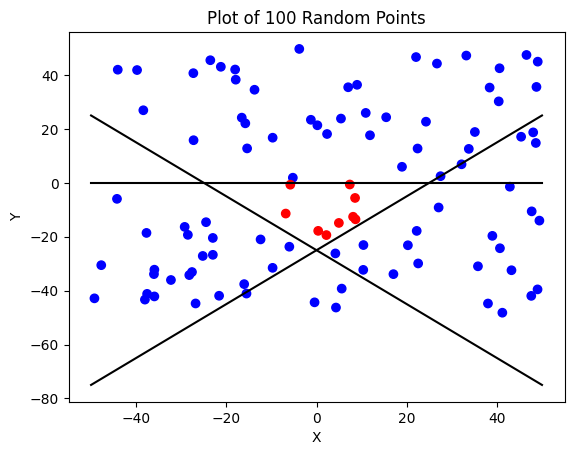

In [47]:
# تولید صد نقطه تصادفی با مختصات بین -50 و 50
points = np.random.uniform(low=-50, high=50, size=(100, 2))
matrix = np.zeros (100) #ماتریس رنگ ها

#دادن هر نقطه به شبکه و محاسبه خروجی
for i in range (100):
    M1 = points[i,0]*W1[0]+points[i,1]*W1[1]+bias1
    M1 = calculate_output (M1)
    M2 = points[i,0]*W2[0]+points[i,1]*W2[1]+bias2
    M2 = calculate_output (M2)
    M3 = points[i,0]*W3[0]+points[i,1]*W3[1]+bias3
    M3 = calculate_output (M3)
    RP = ([M1,M2,M3])
    M4 = RP[0]*W4[0]+RP[1]*W4[1]+RP[2]*W4[2]+bias4
    M4 = calculate_output (M4)
    matrix[i] = M4

xp = points[:, 0]
yp = points[:, 1]
colors = colors = np.where(matrix == 1, 'red', 'blue') 

# رسم نقاط با رنگ‌های مشخص
plt.scatter(xp, yp, c=colors)
plt.plot(x, y1, color='black')
plt.plot(x, y2, color='black')
plt.plot(x, y3, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of 100 Random Points')
plt.show()